In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [3]:
df = pd.read_csv('/content/drive/MyDrive/DIBIMBING/Day 21 - Hands On Data Science Project with Python/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
# Menampilkan 5 baris teratas dari data
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Columns Explanation:
- customerID = Customer ID

- gender = Whether the customer is a male or a female

- SeniorCitizen = Whether the customer is a senior citizen or not (1, 0)

- Partner = Whether the customer has a partner or not (Yes, No)

- Dependents = Whether the customer has dependents or not (Yes, No)

- tenure = Number of months the customer has stayed with the company

- PhoneService = Whether the customer has a phone service or not (Yes, No)

- MultipleLines = Whether the customer has multiple lines or not (Yes, No, No phone service)

- InternetService = Customer’s internet service provider (DSL, Fiber optic, No)

- OnlineSecurity = Whether the customer has online security or not (Yes, No, No internet service)

In [5]:
# jumlah nilai yang hilang per kolom
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


tidak ada data yang hilang

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df['TotalCharges'].value_counts()

,count
TotalCharges,
,11
20.2,11
19.75,9
20.05,8
19.9,8
...,...
6849.4,1
692.35,1
130.15,1


ternyata ada data yang hanya mengandung spasi tanpa angka dan akan dihapus baris tersebut

In [8]:
# Menghapus baris yang mengandung spasi pada kolom 'TotalCharges'
df = df.loc[~df['TotalCharges'].str.contains(' ')] #mengambil baris TotalCharges yang tidak ada ' ' atau string

In [9]:
# Mengubah tipe data kolom 'TotalCharges' menjadi float
df['TotalCharges'] = df['TotalCharges'].astype(float)

merubah TotalCharges yang awal type datanya object menjadi float karna dalam kolom TotalCharges bilangan desimal

In [10]:
df['SeniorCitizen'].value_counts()

,count
SeniorCitizen,
0,5890
1,1142


In [11]:
#hanya menampilkan kolom seniorcitizen
df['SeniorCitizen']

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [12]:
# mengubah tipe data SeniorCitizen
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

In [13]:
# Mengganti nilai 0 dan 1 dengan label 'No' dan 'Yes'
df['SeniorCitizen'] = df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

Mengubah SeniorCitizen menjadi label yang lebih bermakna: Menggunakan df['SeniorCitizen'].replace({0: 'No', 1: 'Yes'}) untuk mengganti nilai 1 dan 0 dengan "Yes" dan "No".

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

In [15]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
#duplicates
df.duplicated().sum()

0

setelah dicek mengenai duplikat data ternyata nol

# Data Understanding

In [17]:
# Mengkelompokan data berdasarkan numeric dan kategorik
numerik = ['tenure','MonthlyCharges', 'TotalCharges']
kategorik = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']

In [18]:
#Ringkasan stastistik untuk kolom numeric
df[numerik].describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


### Explanation 1:
1. tenure ,
- Nilai mean(32.42) dengan median (29.00). Dapat disimpulkan bahwa mean> median dan dapat diartikan distribusi data tersebut right-skewed.
-Nilai minimum (1 bulan) dan maksimum  (72 bulan) yang merupakan lama waktu pelanggan telah berlangganan. Data menunjukan bahwa ada variasi signifikan dalam durasi pelanggan berlangganan.

2. MonthlyCharges

- Nilai mean(64.79) dengan median (70.35). Dapat disimpulkan bahwa mean<median dan dapat diartikan distribusi data tersebut left-skewed.
-Biaya bulanan minimal (18.25) dan maksimal(118.75), yang menunjukan bahwa biaya bulanan cukup luas.

3. TotalCharges
- Nilai mean(2238.30) dengan median (1397.47). Dapat disimpulkan bahwa mean> median dan dapat diartikan distribusi data tersebut right-skewed.
- Total pembayaran oleh pelanggan maksimal (18.80) dan maksimal(8684.80). Adanya selisih yang besaar antar median dan mean menunjukan bahwa sebagian kecil pelanggan memiliki total pemayaran yang tinggi, dan membuat distribui pada data ini skewed.

In [19]:
#Ringkasan stastistik untuk kolom kategorical
df[kategorik].describe()

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,5890,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


### Explanation 2:
1. Mayoritas gender customer adalah Male
2. Customer paling banyak merupakan bukan senior citizen
3. Mayoritas customer tidak memiliki partner
4. Custumer banyak yang tidak memiliki tanggungan
5. Hampir semua customer berlangganan phone service
6. Mayoritas customer tidak berlangganan multiplelines
7. Mayoritas customer berlangganan internet service menggunakan Fiber Optic
8. Customer mayoritas tidak berlangganan online security
9. Mayoritas customer tidak berlangganan online backup
10. Customer paling banyak memilih tidak berlangganan device protection
11. Mayoritas customer tidak berlangganan tech support
12. Customer paling banyak tidak berlangganan streaming TV
13. Mayoritas customer tidak berlangganan streaming movies
14. Contract berlangganan paling banyak month-to-month yang digunakan customer
15. Customer banyak menggunakan paperless billing
16. Metode pembayaran yang paling banyak daigunakan adalah Electronic check
17. Mayoritas customer tidak melakukan churn


In [20]:
df['Churn'].value_counts()

,count
Churn,
No,5163
Yes,1869


In [21]:
df['Churn'].value_counts(normalize=True).reset_index() # Bukti bahwa mayoritas customer tidak churn

,Churn,proportion
0,No,0.734215
1,Yes,0.265785


maka dapat dijelaskan bahwa data churn ini imbalance yang nantinya akan dicoba mengunakan heandling imbalance dibagian Data Preprocessing

#Analisis univariat, yaitu analisis satu variabel pada suatu waktu.

In [22]:
# Membuat histogram dan boxplot untuk setiap kolom numerik
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(numeric_columns)

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')


Membuat histogram untuk melihat distribusi

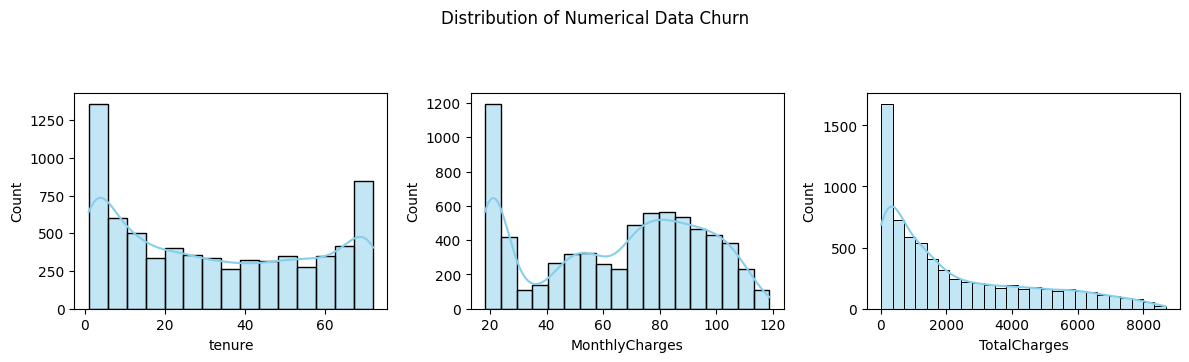

In [23]:
# Melihat distribusi data
plt.figure(figsize=(12,6))
for i in range(0, len(numerik)):
  plt.subplot(2, len(numerik), i+1)
  sns.histplot(x=df[numerik[i]], color='skyblue', kde=True)
  plt.xlabel(numerik[i])
plt.suptitle('Distribution of Numerical Data Churn')
plt.tight_layout(rect= [0,0,1,0.92])

Tenure: Dari chart dapat terlihat bahwa mayoritas pelanggan memiliki nilai rendah, yang dapat diartikan bahwa banyak pelanggan yang baru bergabung. Terdapat dua puncak yang menandakan bahwa terbentuk distribusi bimodal ( jenis distribusi probabilitas yang memiliki dua puncak (mode) yang terlihat dalam grafik distribusi data).

MonthlyCharges: Distribusi pada chart menunjukan cenderung memiliki ekor panjang di sebelah kanan, yang dapat diartikan bahwa ada Banyak pelanggan membayar biaya bulanan yang rendah, dan ini bisa jadi menunjukkan bahwa biaya bulanan yang lebih rendah lebih umum di kalangan pelanggan yang lebih lama atau lebih cenderung tidak churn. Terdapat sedikit puncak lebih tinggi di sisi kanan, yang menandakan bahwa ada kelompok pelanggan dengan biaya bulanan lebih tinggi, yang mungkin menunjukkan pelanggan yang lebih setia atau dengan layanan lebih premium.

TotalCharges:Distribusinya lebih terfokus pada biaya yang lebih rendah, dengan adanya beberapa pelanggan yang memiliki total biaya tinggi karena berlangganan lebih lama dan membayar biaya bulanan lebih tinggi.

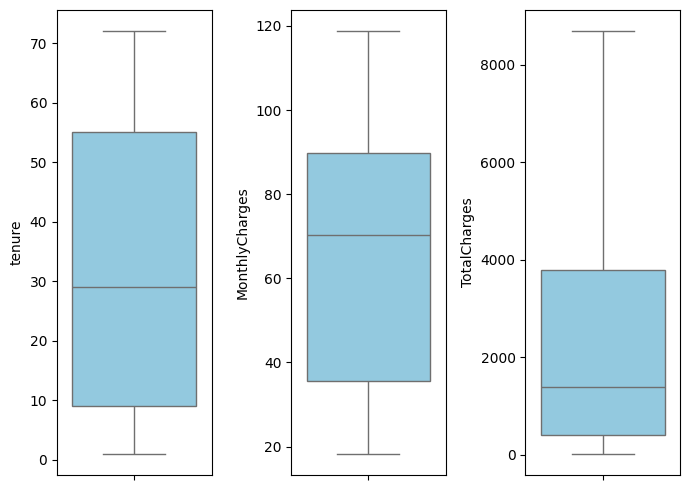

In [24]:
# mengecek outliers
plt.figure(figsize=(7,5))

for i in range(0,len(numerik)):
  plt.subplot(1, len(numerik),i+1)
  sns.boxplot(y=df[numerik[i]], color='skyblue')
  plt.tight_layout()

penjelasan bahwa Tidak ada outliers di kolom  tenure, MonthlyCharges, TotalCharges

###Analisis Univariat untuk Kolom Kategorikal:

- Menampilkan frekuensi dan proporsi kategori
- Membuat bar plot untuk melihat distribusi kategori

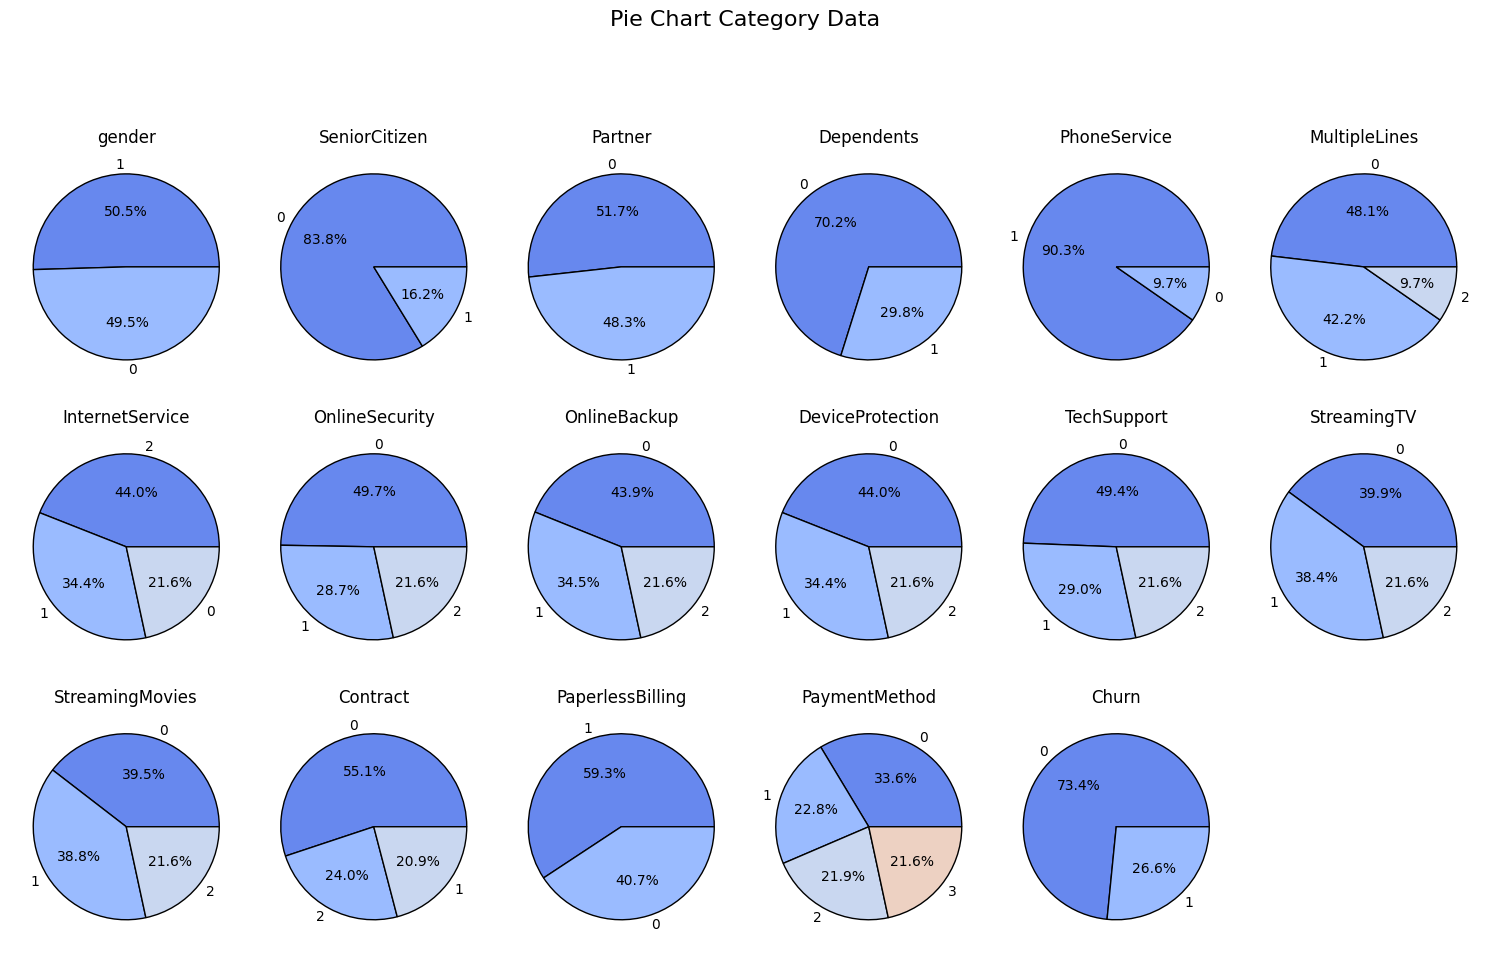

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical columns
kategorik = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']  # Make sure these names match your DataFrame columns

# Verify column names
for col in kategorik:
    if col not in df.columns:
        print(f"Column '{col}' does not exist in DataFrame")
        kategorik.remove(col)

# Plot pie chart for each categorical column
plt.figure(figsize=(15, 10))

for i in range(len(kategorik)):
    plt.subplot(3, 6, i + 1)
    df[kategorik[i]].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('coolwarm'), wedgeprops={'edgecolor': 'black'})
    plt.title(kategorik[i])
    plt.ylabel('')  # Remove y-label for pie charts

plt.suptitle('Pie Chart Category Data', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


**penjelasan** :
1. Gender : jika dilihat dari visualisasi menunjukan sama banyak antara male dan female
2. SeniorCitizen :Customer paling banyak merupakan bukan senior citizen
3. Partner : jika dilihat dari visualisasi menunjukan sama banyak antara yang tidak partner dan partner sama banyak.
4. Dependents : Custumer banyak yang tidak memiliki tanggungan
5. PhoneService : Hampir semua customer berlangganan phone service
6. MultipleLines : Mayoritas customer tidak berlangganan multiplelines
7. InternetService : Mayoritas customer berlangganan internet service menggunakan Fiber Optic
8. OnlineSecurity : Customer mayoritas tidak berlangganan online security
9. OnlineBackup : Mayoritas customer tidak berlangganan online backup
10. DeviceProtection : Customer paling banyak memilih tidak berlangganan device protection
11. TechSupport : Mayoritas customer tidak berlangganan tech support
12. StreamingTV : Customer paling banyak tidak berlangganan streaming TV
13. StreamingMovies : Mayoritas customer tidak berlangganan streaming movies
14. Contract : Contract berlangganan paling banyak month-to-month yang digunakan customer
15. PaperlessBilling : Customer banyak menggunakan paperless billing
16. PaymentMethod : Metode pembayaran yang paling banyak daigunakan adalah Electronic check
17. Churn : Mayoritas customer tidak melakukan churn


#Analisis multivariat, yaitu analisis yang melibatkan lebih dari satu variabel.

Analisis Korelasi untuk Kolom Numerik:

Menghitung matriks korelasi
Membuat heatmap untuk visualisasi korelasi

In [26]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


<ipython-input-27-323d61364177>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:skyblue'` for the same effect.

  sns.countplot(


Text(0.5, 1.0, 'Customer Distribution Contract by Churn')

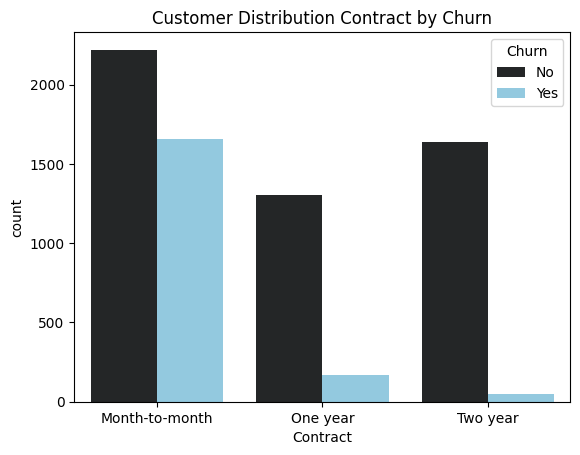

In [27]:
sns.countplot(
    data= df, x= 'Contract', hue='Churn', color='skyblue'
)
plt.title('Customer Distribution Contract by Churn')

penjelasan
1. Customer mayoritas tidak melakukan churn
2. Customer yang tidak melakukan churn dan melakukan churn
 paling banyak berlangganan Month-to-Month

In [28]:
# Menghitung matriks korelasi hanya untuk kolom numerik
correlation_matrix = df.select_dtypes(include=['number']).corr()

In [29]:
# Menampilkan matriks korelasi
print("Matriks Korelasi:")
print(correlation_matrix)

Matriks Korelasi:
                  tenure  MonthlyCharges  TotalCharges
tenure          1.000000        0.246862      0.825880
MonthlyCharges  0.246862        1.000000      0.651065
TotalCharges    0.825880        0.651065      1.000000


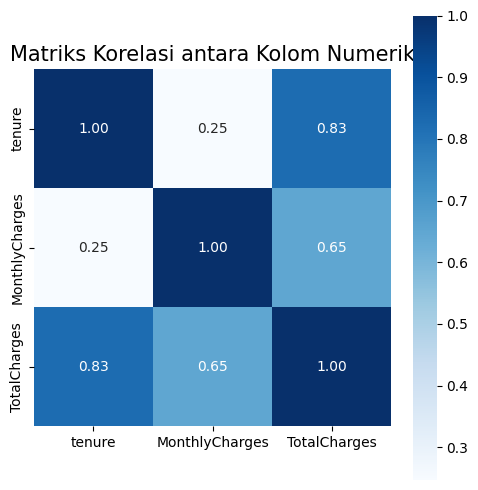

In [30]:
# Visualisasi matriks korelasi menggunakan heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='Blues', square=True)
plt.title('Matriks Korelasi antara Kolom Numerik', fontsize=15)
plt.tight_layout()
plt.show()

penjelasan : Total Charge dan Tenure memiliki hubungan yang positif (berkorelasi)

Untuk menghindari multikolinieritas, saya akan memilih salah satu dari tenure atau TotalCharges untuk dihapus dari analisis. Karena TotalCharges adalah hasil dari tenure dan MonthlyCharges, lebih baik untuk menghapus TotalCharges.

In [31]:
# Menghapus kolom TotalCharges dari dataset
df = df.drop(columns=['TotalCharges'])

# Memastikan kolom telah dihapus
print(df.columns)

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')


#pertanyaan
1. Internet Service mana yang paling banyak digunakan oleh customer?

In [32]:
churn_sort = df['InternetService'].value_counts().reset_index()
churn_sort.columns=['InternetService', 'count']
churn_sort= churn_sort.sort_values(by='count', ascending=False)
churn_sort

,InternetService,count
0,Fiber optic,3096
1,DSL,2416
2,No,1520


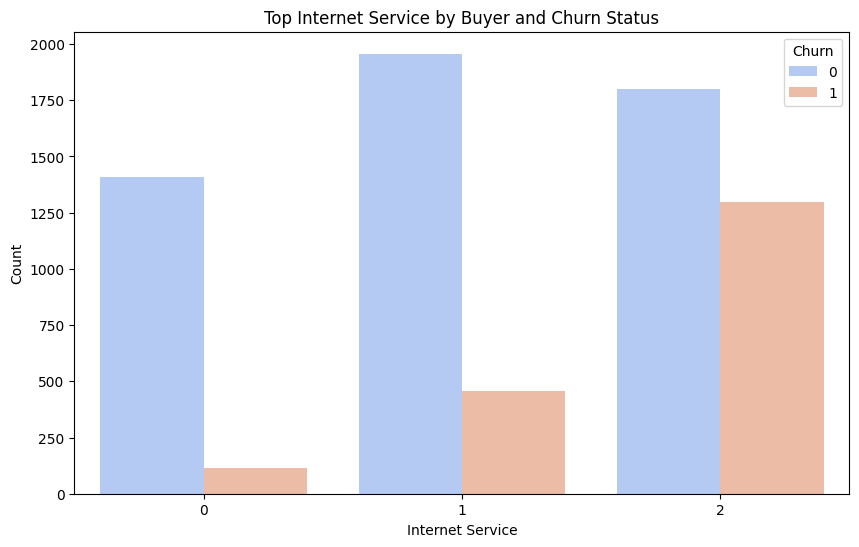

In [70]:
# Assuming 'df' is your original DataFrame with 'InternetService' and 'Churn' columns
churn_sort = df.groupby(['InternetService', 'Churn'])['customerID'].count().reset_index()
churn_sort.columns=['InternetService', 'Churn', 'count']
churn_sort= churn_sort.sort_values(by='count', ascending=False)

# Create a bar plot with hue to separate by Churn status
plt.figure(figsize=(10, 6))
sns.barplot(data=churn_sort, x='InternetService', y='count', hue='Churn', palette='coolwarm')
plt.title('Top Internet Service by Buyer and Churn Status')
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.show()

- 0 - No Internet Service: Mayoritas pelanggan tanpa layanan internet menunjukkan tingkat churn yang sangat rendah.

- 1 - DSL (Digital Subscriber Line): Pelanggan dengan layanan DSL menunjukkan tingkat churn yang rendah.

- 2 - Fiber Optic: Pelanggan dengan layanan fiber optic menunjukkan tingkat churn yang lebih tinggi dibandingkan dengan dua jenis layanan lainnya.

3.Rata-rata Biaya Bulanan Pelanggan berdasarkan Jenis Kelamin dan Status Churn

In [34]:
# Menghitung rata-rata biaya bulanan berdasarkan jenis kelamin dan status churn
average_monthly_by_gender = df.groupby(['gender', 'Churn'])['MonthlyCharges'].mean().reset_index()

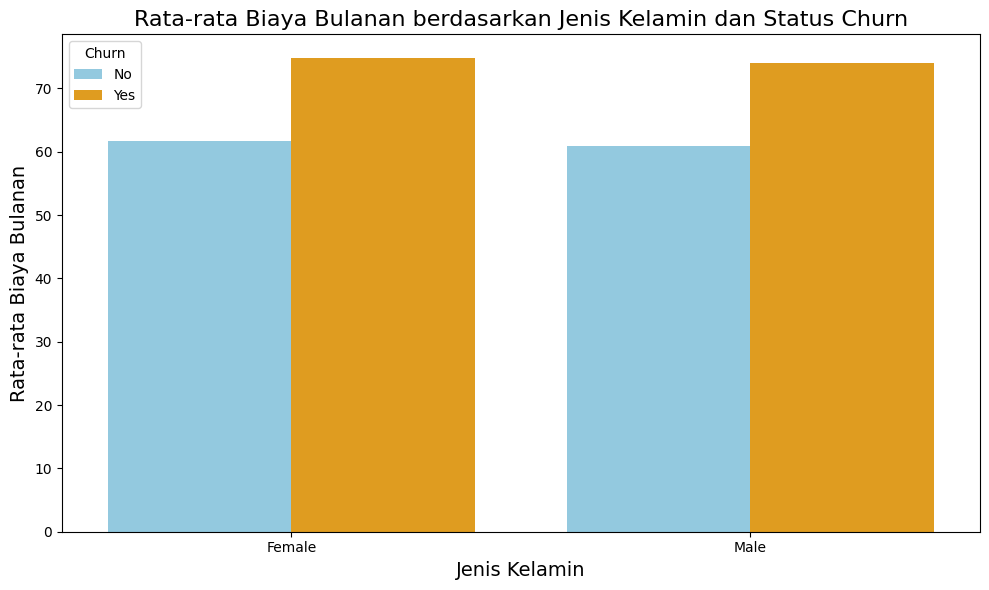

   gender Churn  MonthlyCharges
0  Female    No       61.674941
1  Female   Yes       74.812087
2    Male    No       60.950401
3    Male   Yes       74.066989


In [35]:
# Visualisasi
plt.figure(figsize=(10, 6))
sns.barplot(data=average_monthly_by_gender, x='gender', y='MonthlyCharges', hue='Churn', palette=['skyblue', 'orange']) # Changed palette to a list of colors
plt.title('Rata-rata Biaya Bulanan berdasarkan Jenis Kelamin dan Status Churn', fontsize=16)
plt.xlabel('Jenis Kelamin', fontsize=14)
plt.ylabel('Rata-rata Biaya Bulanan', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Churn')
plt.tight_layout()
plt.show()

print(average_monthly_by_gender)

penjelasan : tidak ada pengaruh jenis kelamin dan churn

Insight ; rata-rata biaya bulanan menunjukkan bahwa pelanggan perempuan yang tidak churn memiliki biaya rata-rata sebesar 61.67 dolar, sedangkan yang churn sebesar 74.81 dolar. Untuk pelanggan laki-laki, rata-rata biaya bulanan yang tidak churn adalah 60.95 dolar, sedangkan yang churn adalah 74.07 dolar. Terlihat bahwa pelanggan dengan biaya bulanan yang lebih tinggi cenderung lebih mungkin mengalami churn. Rata-rata biaya bulanan terendah adalah 18.25 dolar, sementara tertinggi adalah 118.75 dolar. Kesimpulannya, untuk mengurangi churn, perlu dilakukan evaluasi terhadap harga paket serta peningkatan kualitas layanan, mengingat pelanggan dengan biaya bulanan tinggi lebih rentan untuk churn.

# 4. Hipotesis

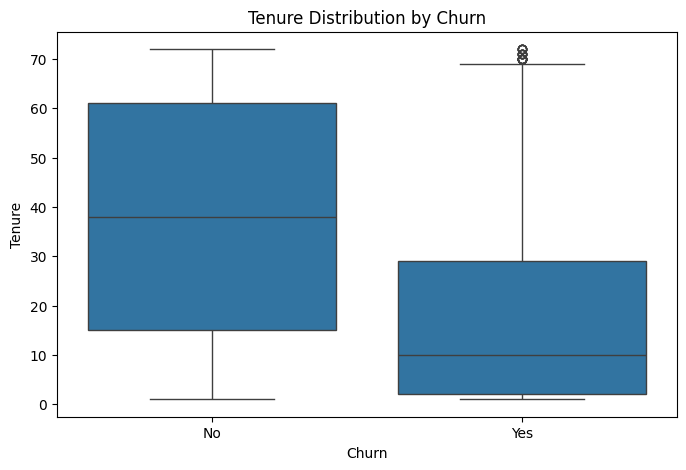

In [36]:
# Visualisasi distribusi tenure berdasarkan status churn
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Churn', y='tenure')
plt.title('Tenure Distribution by Churn')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

Untuk menguji Hipotesis : Pengaruh Tenure terhadap Churn, kita bisa menggunakan uji statistik t-test dua sampel independen. Hipotesis ini menguji apakah ada perbedaan signifikan dalam rata-rata tenure antara pelanggan yang churn dan non-churn.

In [37]:
from scipy.stats import ttest_ind

# Memisahkan data berdasarkan churn
churn_yes = df[df['Churn'] == 'Yes']['tenure']
churn_no = df[df['Churn'] == 'No']['tenure']

# Menjalankan uji t dua sampel independen
t_stat, p_value = ttest_ind(churn_yes, churn_no)

# Menampilkan hasil t-test
print(f"P-value: {p_value}")

# Menarik kesimpulan
if p_value < 0.05:
    print("Ada perbedaan signifikan dalam rata-rata Tenure antara pelanggan yang churn dan non-churn.")
else:
    print("Tidak ada perbedaan signifikan dalam rata-rata Tenure antara pelanggan yang churn dan non-churn.")


P-value: 9.437650217574845e-207
Ada perbedaan signifikan dalam rata-rata Tenure antara pelanggan yang churn dan non-churn.



Kesimpulan:

P-value < 0.05 menunjukkan bahwa ada perbedaan yang signifikan secara statistik dalam rata-rata tenure antara pelanggan yang churn dan yang tidak churn.

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 
 17  

**Memisahkan Fitur dan Target**

**Encoding**

TechSupport	1520
StreamingTV	1520
StreamingMovies	1520

In [39]:
# Mapping nilai
df['gender'] = df['gender'].map({'Female': 0, 'Male': 1})
df['SeniorCitizen'] = df['SeniorCitizen'].map({'No': 0, 'Yes': 1})
df['Partner'] = df['Partner'].map({'No': 0, 'Yes': 1})
df['Dependents'] = df['Dependents'].map({'No': 0, 'Yes': 1})
df['PhoneService'] = df['PhoneService'].map({'No': 0, 'Yes': 1})
df['MultipleLines'] = df['MultipleLines'].map({'No': 0, 'Yes': 1, 'No phone service': 2})
df['InternetService'] = df['InternetService'].map({'No': 0, 'DSL': 1, 'Fiber optic': 2})
df['OnlineSecurity'] = df['OnlineSecurity'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['OnlineBackup'] = df['OnlineBackup'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['DeviceProtection'] = df['DeviceProtection'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['TechSupport'] = df['TechSupport'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingTV'] = df['StreamingTV'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['StreamingMovies'] = df['StreamingMovies'].map({'No': 0, 'Yes': 1, 'No internet service': 2})
df['Contract'] = df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
df['PaperlessBilling'] = df['PaperlessBilling'].map({'No': 0, 'Yes': 1})
df['PaymentMethod'] = df['PaymentMethod'].map({'Electronic check': 0, 'Mailed check': 1, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})
df['Churn'] = df['Churn'].map({'No': 0, 'Yes': 1})
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,1


**Memisahkan Fitur dan Target**

In [40]:
# Pisahkan fitur dan target
X = df.drop(['Churn'],axis = 1)
y = df['Churn']

**Data Splitting**

In [41]:
#Data Splitting
# Split data menjadi training, testing, dan validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
# Menampilkan ukuran dataset
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")

Shape of X_train: (5625, 19)
Shape of X_test: (1407, 19)


In [43]:
# Drop kolom 'customerID' karena tidak relevan
X_train = X_train.drop('customerID', axis=1)
X_test = X_test.drop('customerID', axis=1)

In [44]:
# Mengecek missing values
X_train.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [45]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,1,0,0,0,0,0,1,0,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,0,1,0,0,0,1,0,1,56.95,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,1,0,0,0,0,0,1,1,53.85,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,0,1,1,0,0,1,0,2,42.30,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,0,0,0,0,0,0,1,0,70.70,1


**SMOTE (Untuk Menyeimbangkan Data)**

In [46]:
!pip install imblearn

# Import necessary libraries
from imblearn.over_sampling import SMOTE
from collections import Counter

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5625 entries, 1413 to 1505
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5625 non-null   int64  
 1   SeniorCitizen     5625 non-null   int64  
 2   Partner           5625 non-null   int64  
 3   Dependents        5625 non-null   int64  
 4   tenure            5625 non-null   int64  
 5   PhoneService      5625 non-null   int64  
 6   MultipleLines     5625 non-null   int64  
 7   InternetService   5625 non-null   int64  
 8   OnlineSecurity    5625 non-null   int64  
 9   OnlineBackup      5625 non-null   int64  
 10  DeviceProtection  5625 non-null   int64  
 11  TechSupport       5625 non-null   int64  
 12  StreamingTV       5625 non-null   int64  
 13  StreamingMovies   5625 non-null   int64  
 14  Contract          5625 non-null   int64  
 15  PaperlessBilling  5625 non-null   int64  
 16  PaymentMethod     5625 non-null   int64  
 1

In [48]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges
1413,1,0,1,1,65,1,1,2,1,1,1,1,0,0,2,0,3,94.55
7003,1,0,0,0,26,0,2,1,0,0,1,1,0,0,0,0,0,35.75
3355,0,0,1,0,68,1,1,2,0,1,1,1,0,0,2,0,3,90.20
4494,1,0,0,0,3,1,0,2,0,1,0,0,0,1,0,0,0,84.30
3541,0,0,1,0,49,0,2,1,1,0,0,0,1,0,0,0,2,40.65


In [49]:
X_train.value_counts()

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  MultipleLines  InternetService  OnlineSecurity  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  StreamingMovies  Contract  PaperlessBilling  PaymentMethod  MonthlyCharges
1       0              0        0           1       1             0              0                2               2             2                 2            2            2                0         0                 1              20.20             4
                                                                                                                                                                                                                                        20.05             3
0       0              0        0           1       1             0              0                2               2             2                 2            2            2                0         0                 1              19.90             3
                                                                                                                                                                                                                                        19.65             3
                                                                                                                                                                                                                                        20.90             3
                                                                                                                                                                                                                                                         ..
                       1        1           24      1             1              2                0               1             1                 0            0            0                1         0                 2              83.15             1
                                                                                 1                1               1             1                 0            0            0                2         0                 0              64.35             1
                                                                                                                                0                 0            1            1                1         0                 0              78.40             1
                                                                                                                  0             1                 0            1            1                2         0                 3              78.60             1
1       1              1        1           72      1             1              2                1               1             1                 1            1            1                2         1                 3              115.75            1
Name: count, Length: 5597, dtype: int64

In [50]:
# SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Tampilkan distribusi data setelah SMOTE
print("Distribusi kelas sebelum SMOTE:", Counter(y_train))
print("Distribusi kelas setelah SMOTE:", Counter(y_train_resampled))

Distribusi kelas sebelum SMOTE: Counter({0: 4130, 1: 1495})
Distribusi kelas setelah SMOTE: Counter({0: 4130, 1: 4130})


note : alasan kenapa mengunakan undersampling dibanding dengan over sampling dan smote

**Scaling**

In [51]:
from sklearn.preprocessing import StandardScaler #scaling
scaler = StandardScaler()
scaler.fit(X_train_resampled)  # Menghitung mean dan standar deviasi dari data training
X_train_std = scaler.transform(X_train_resampled)  # Transformasi data training
X_test_std = scaler.transform(X_test)   # Transformasi data test

fit itu mempelajari
transform untuk mengubah data

#Modeling

data preprocessing > modeling > evaluasi

In [52]:
# 1. Decision Tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier # Import DecisionTreeClassifier
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_std, y_train_resampled)

DecisionTreeClassifier(random_state=42)

In [53]:
#EVALUASI train
#Decision Tree
y_train_pred_dt = dt_model.predict(X_train_std)
from sklearn.metrics import classification_report, f1_score
print("Decision Tree - Train F1 Score:", f1_score(y_train_resampled, y_train_pred_dt))

Decision Tree - Train F1 Score: 0.9987884661982069


In [54]:
#EVALUASI test
#Decision Tree
y_test_pred_dt = dt_model.predict(X_test_std)
from sklearn.metrics import classification_report, f1_score
print("Decision Tree - test F1 Score:", f1_score(y_test, y_test_pred_dt))

Decision Tree - test F1 Score: 0.5060240963855421


In [55]:
# 2. Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_std, y_train_resampled)

RandomForestClassifier(random_state=42)

In [56]:
#EVALUASI train
#Random Forest
y_train_pred_rf = rf_model.predict(X_train_std)
from sklearn.metrics import classification_report, f1_score
print("Random Forest - Train F1 Score:", f1_score(y_train_resampled, y_train_pred_rf))

Random Forest - Train F1 Score: 0.9987893462469734


In [57]:
#EVALUASI test
#Random Forest
y_test_pred_rf = rf_model.predict(X_test_std)
from sklearn.metrics import classification_report, f1_score
print("Random Forest - Test F1 Score:", f1_score(y_test, y_test_pred_rf))

Random Forest - Test F1 Score: 0.5774473358116481


In [58]:
from lightgbm import LGBMClassifier

# LightGBM
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train_std, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Number of positive: 4130, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001853 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 387
[LightGBM] [Info] Number of data points in the train set: 8260, number of used features: 18
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


LGBMClassifier(random_state=42)

In [59]:
#EVALUASI train
y_train_pred_lgbm = lgbm_model.predict(X_train_std)
from sklearn.metrics import classification_report, f1_score
print("LightGBM - Train F1 Score:", f1_score(y_train_resampled, y_train_pred_lgbm))

LightGBM - Train F1 Score: 0.8984886350113055


In [60]:
# EVALUASI test
y_test_pred_lgbm = lgbm_model.predict(X_test_std)
from sklearn.metrics import classification_report, f1_score
print("LightGBM - Test F1 Score:", f1_score(y_test, y_test_pred_lgbm))

LightGBM - Test F1 Score: 0.5703703703703704


In [61]:
from sklearn.linear_model import LogisticRegression

# LogisticRegression
logreg_model = LogisticRegression(random_state=42, max_iter=1000)
logreg_model.fit(X_train_std, y_train_resampled)

LogisticRegression(max_iter=1000, random_state=42)

In [62]:
# EVALUASI train
y_train_pred_logreg = logreg_model.predict(X_train_std)
from sklearn.metrics import classification_report, f1_score
print("Logistic Regression - Train F1 Score:", f1_score(y_train_resampled, y_train_pred_logreg))

Logistic Regression - Train F1 Score: 0.8075270066209781


In [63]:
# EVALUASI test
y_test_pred_logreg = logreg_model.predict(X_test_std)
from sklearn.metrics import classification_report, f1_score
print("Logistic Regression - Test F1 Score:", f1_score(y_test, y_test_pred_logreg))

Logistic Regression - Test F1 Score: 0.5823336968375137


buatkan hyperparameter tuning untuk semua model kecuali logreg

knn, xgb,dt, rf, lgbm

note : gunakan lebih banyak lagi model lain dan cari yang paling bagus atau cek kembali undersampling (membuat datanya menjadi sedikit jadi menyebabakan data itu tidak belajar dengan baik), coba over sampling atau smote

Decision Tree - Train F1 Score: 0.4165358451072737

Decision Tree - test F1 Score: 0.38358974358974357

Random Forest - Train F1 Score: 0.5070888468809074

Random Forest - Test F1 Score: 0.4753946146703807

LightGBM - Train F1 Score: 0.4149079479119892

LightGBM - Test F1 Score: 0.39168110918544197

Logistic Regression - Train F1 Score: 0.5643537414965987

Logistic Regression - Test F1 Score: 0.5623678646934461

Model Logistic Regression menunjukkan performa terbaik dengan F1 Score 0.562 pada data pengujian, lebih tinggi dibandingkan Decision Tree, Random Forest, dan LightGBM. Hal ini menunjukkan kemampuan Logistic Regression dalam menangani ketidakseimbangan kelas dan generalisasi yang lebih baik pada data baru. Meskipun Random Forest dan LightGBM memiliki F1 Score lebih tinggi di data pelatihan, penurunan performa di data pengujian menunjukkan overfitting. Jadi, Logistic Regression lebih efektif dalam menghasilkan hasil yang stabil dan dapat diandalkan.